In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# loading the dataset

df = pd.read_csv('D:\Medical diagnosis AI\Datasets\Thyroid_Diff.csv')

In [23]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [24]:
df.shape

(383, 17)

In [25]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [26]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 
                    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 
                    'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Apply Label Encoding
label_encoders = {}  # Dictionary to store label encoders

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the first few rows
print(df.head())

   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                     4           3          2         1     2  0  0  0   
4                     1           3          2         0     2  0  0  0   

   Stage  Response  Recurred  
0      0         2         0  
1      0         1         0  
2      0   

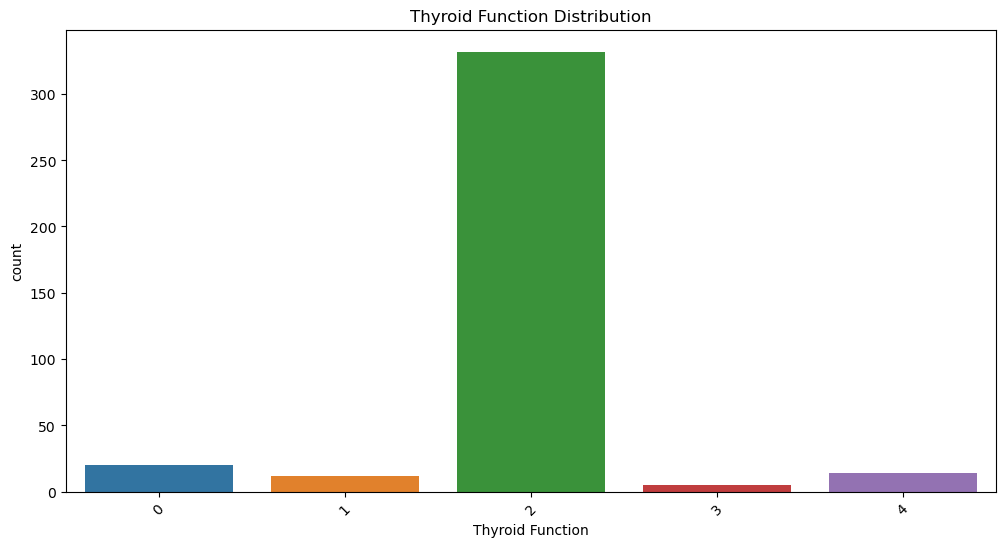

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x=df["Thyroid Function"])  # Replace with any categorical column
plt.title("Thyroid Function Distribution")
plt.xticks(rotation=45)
plt.show()

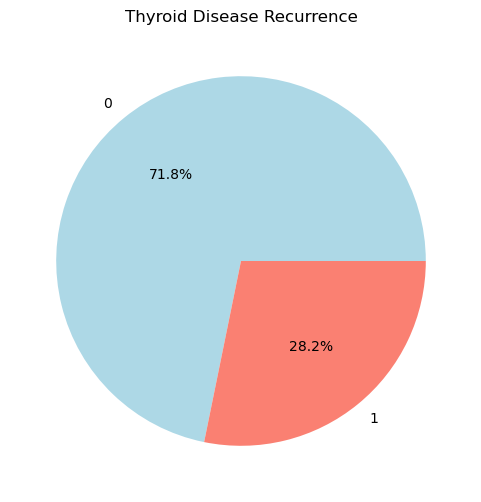

In [29]:
plt.figure(figsize=(6, 6))
df["Recurred"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
plt.title("Thyroid Disease Recurrence")
plt.ylabel("")  
plt.show()

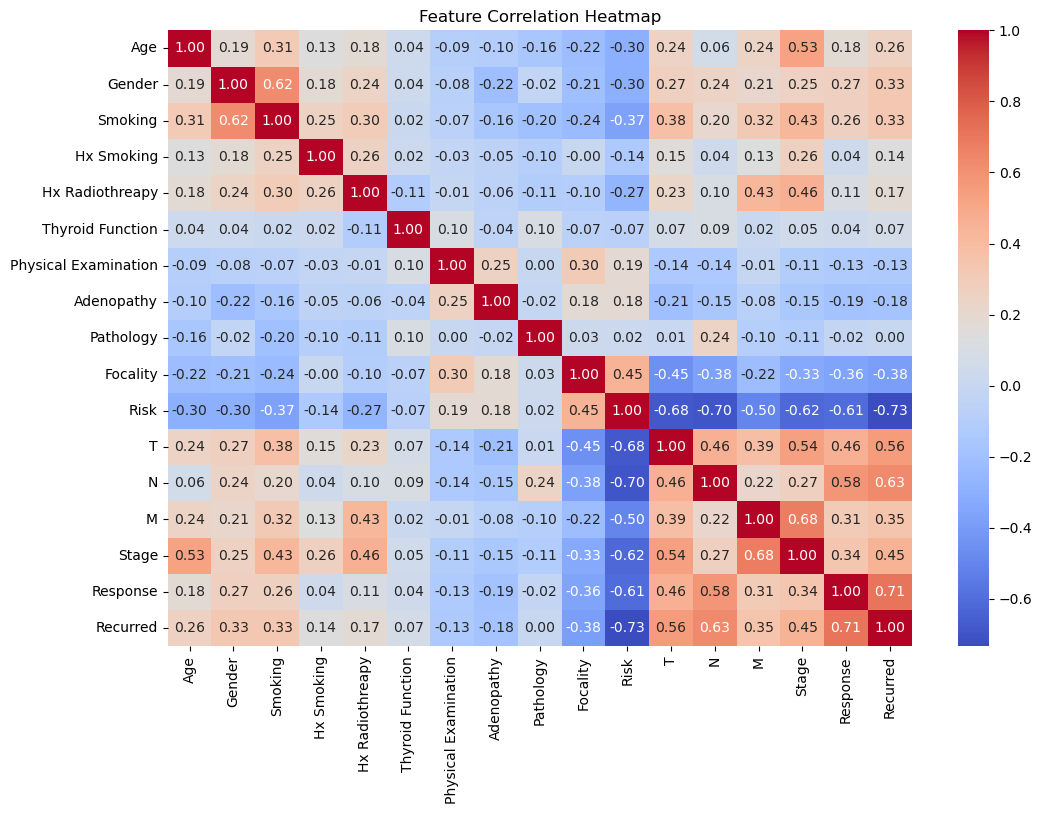

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

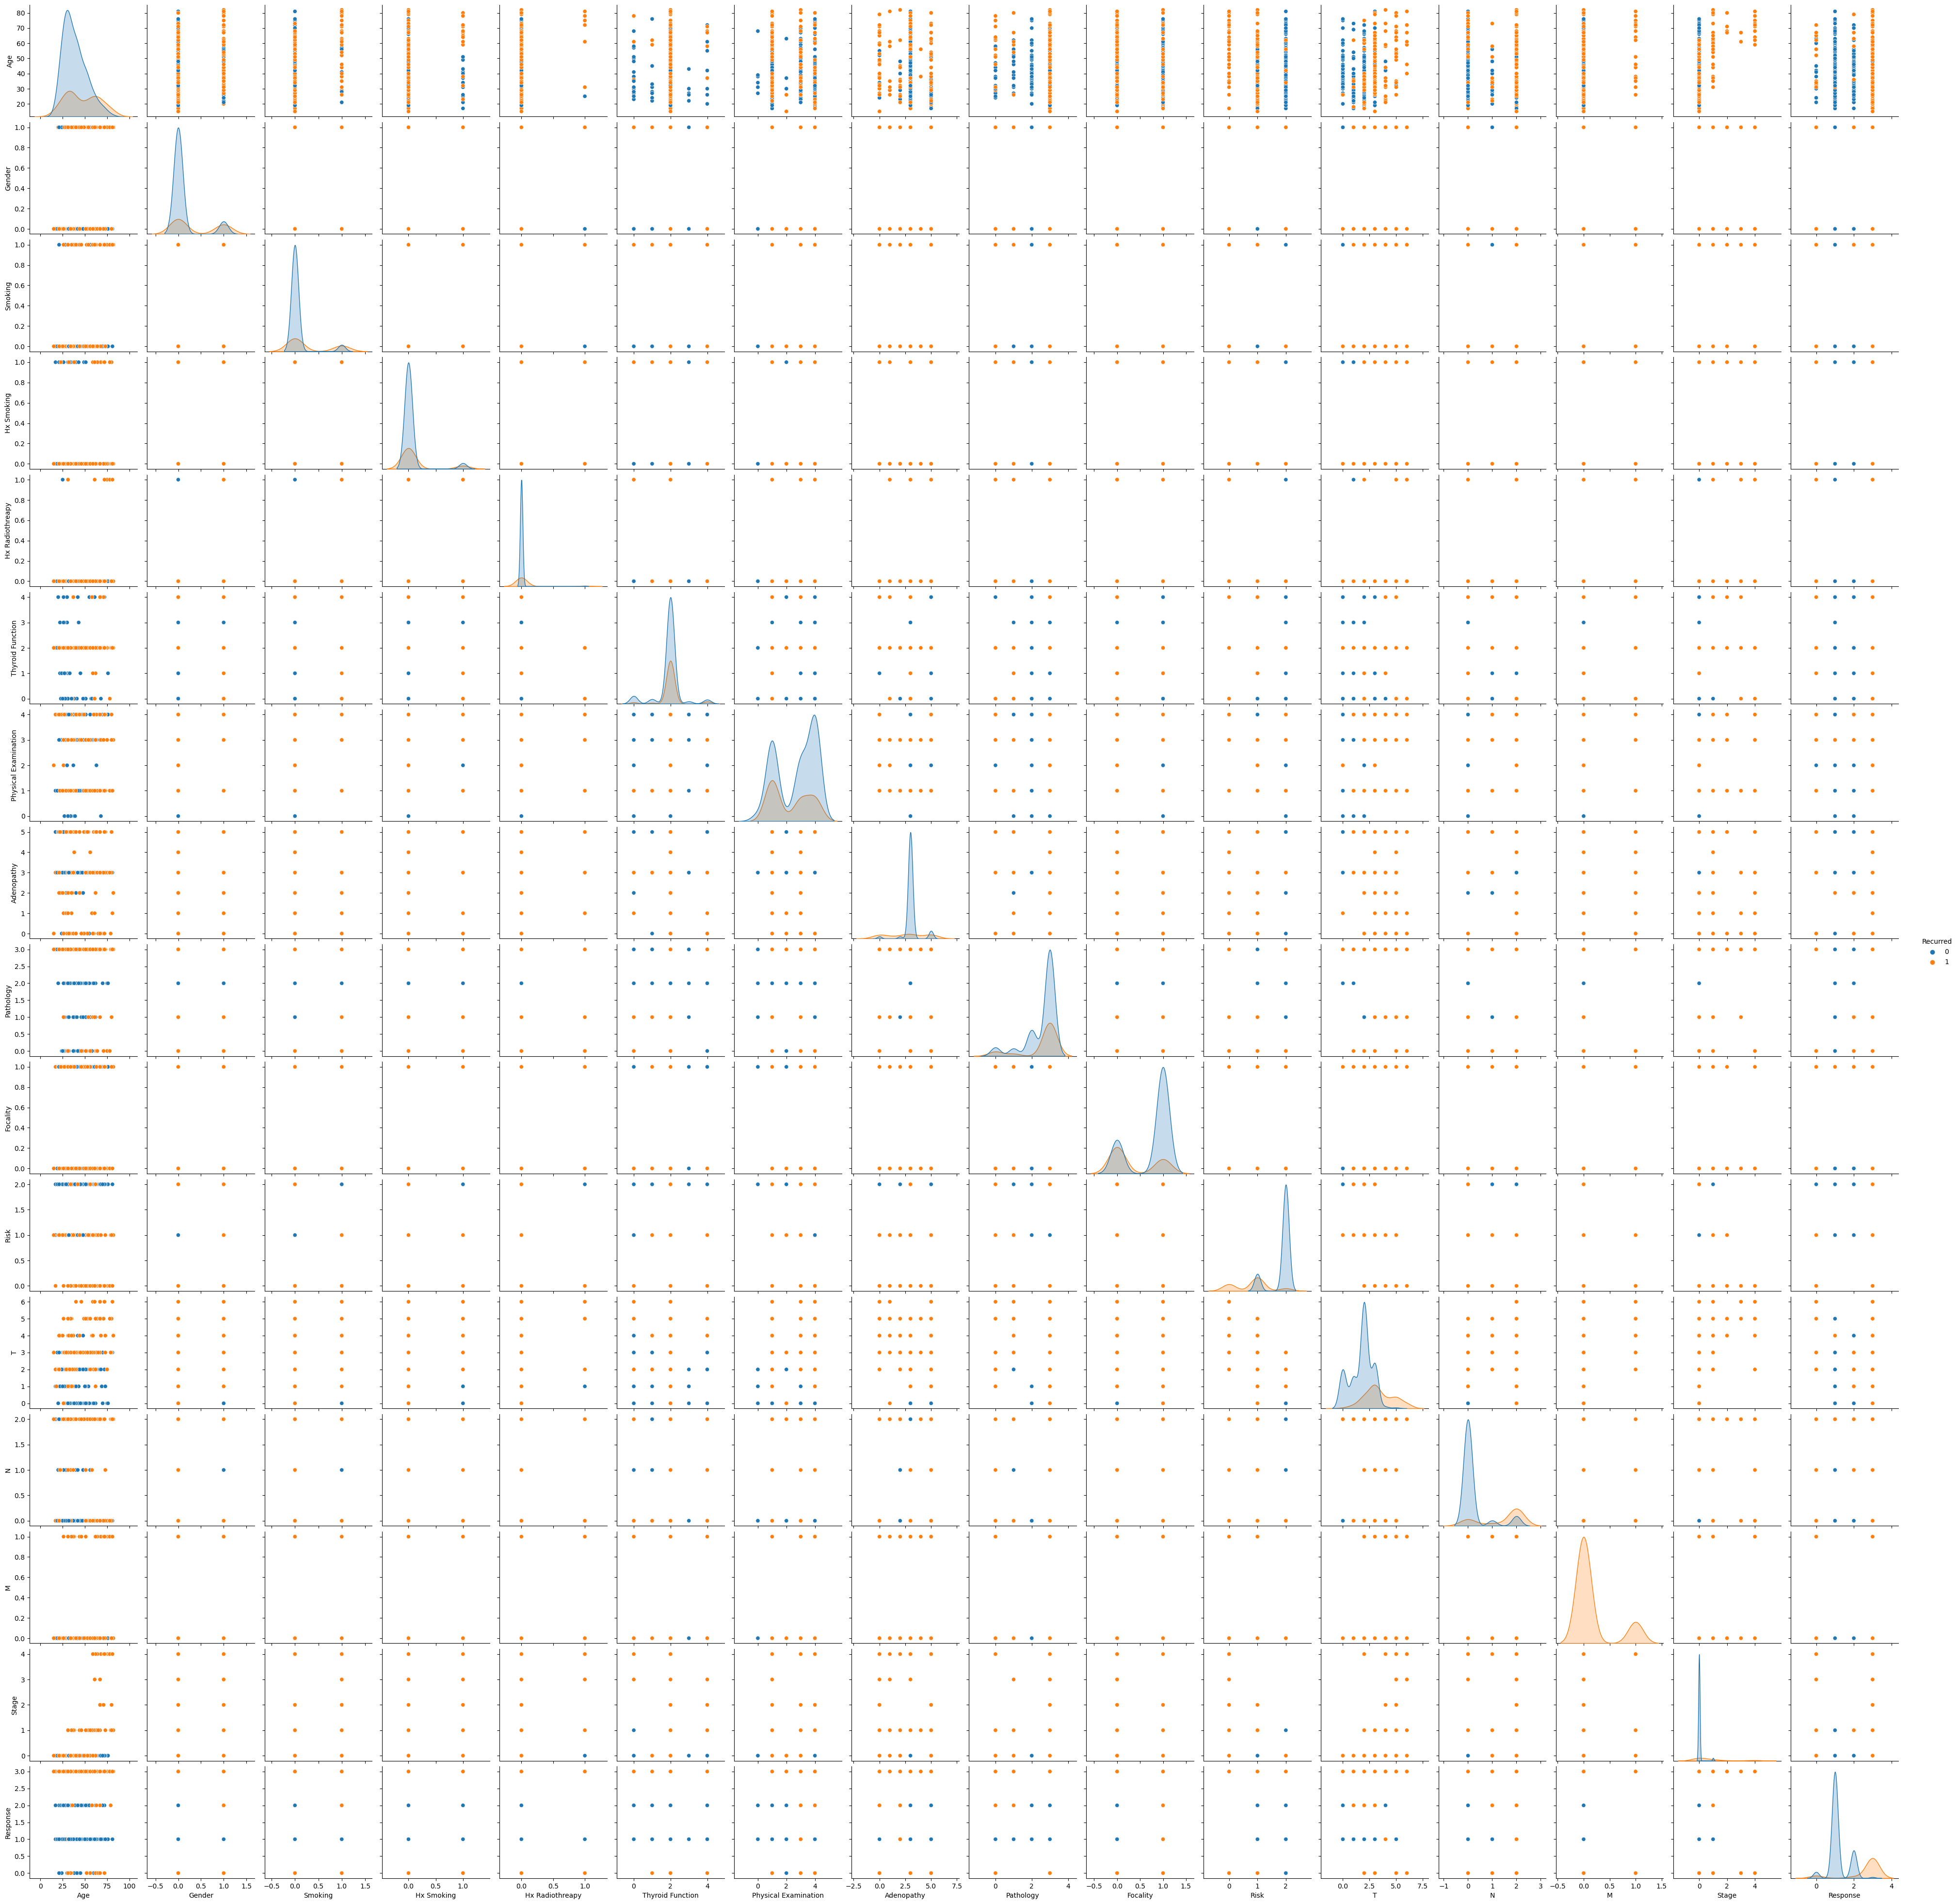

In [31]:
sns.pairplot(df, hue="Recurred", diag_kind="kde")  # Replace 'Recurred' with the target column
plt.show()

In [32]:
# standardize the data

scaler = StandardScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])

In [33]:
#defining features and target

X = df.drop(columns=["Recurred"])  # Features
y = df["Recurred"]  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [36]:
y_pred_train = model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [38]:
#Metrics

ac1=accuracy_score(y_train,Y_pred_train)
print("Training accuracy score:",ac1.round(3))
ac2=accuracy_score(y_test,Y_pred_test)
print("Test accuracy score:",ac2.round(3))

Training accuracy score: 0.938
Test accuracy score: 0.935


In [43]:
# building a predictive system

input_data = (27, 0, 0, 0, 0, 2, 0, 3, 3, 2, 1, 2, 0, 0, 0, 2)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#re sahpe the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
# std_data = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have Thyroid")
    
else:
    print("The person has  Thyroid")

[1]
The person has  Thyroid


C:\ProgramData\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
# saving the model

import pickle

In [45]:
filename = 'Thyroid_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
# loading the saved model
loaded_model = pickle.load(open('Thyroid_model.sav', 'rb'))

In [47]:
for column in X_train.columns:
    print(column)

Age
Gender
Smoking
Hx Smoking
Hx Radiothreapy
Thyroid Function
Physical Examination
Adenopathy
Pathology
Focality
Risk
T
N
M
Stage
Response
